In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.datasets import make_circles

# Kernel methods 
In this notebook we will take a look at quantum kernel methods and how they can be applied in a classification problem. 
Given a specifric dataset, the task of machine learning is to find patterns, for example how is each data point correlated with one another or if the data points can be arranged in groups that display similiar behaviour and so on. 
First of all, the kernel method enables to map inpout data (input space) into an higher dimensional space (feature space) by computing inner products of the mapped data in this new space. But why would one need to increase the dimensionality of the problem in the first place? 
This methods are useful in machine learning because they allow algorithm to run in nonlinear settings. Suppose you have a set of points in a $2$ dimensional space and you want to separate them linearly into two groups. These points may be in such a configuration that is impossible to classify them linearly; however, we can map these points in a $3$ dimensional space, for example, and use an hyperplane to make the separation between points.
The advantage of kernel methods is that they do not actually compute the new coordinates of the points in the feature space (which may not be feasible in terms of compuational costst for large dataset) but the inneer product bewteen the mapped points using a so called kernel function. Moreover, they find applications in many fields of machine learning and have strong theoretical mathematical foundations. 

Suppose we have a classical data set $\mathcal{X} \subset \mathbb{R}^n$ and consider to input vectors $\vec{x}_i, \vec{x}_j \in \mathcal{X}$. Given a function $f:\mathcal{X} \to \mathcal{Y}\subset \mathbb{R}^m$, with $m>n$, the kernel function $k$ is a map $k:\mathcal{X}\times \mathcal{X}\to \mathbb{R}$ of the form
$$
k(\vec{x}_i, \vec{x}_j) = \langle{f(\vec{x}_i),f(\vec{x}_j)}\rangle{}_{\mathcal{Y}}
$$
where $\langle{.,.}\rangle{}_{\mathcal{Y}}$ represents the inner product in the feature space $\mathcal{Y}$. Usually, when treating finite data the kernel is expressed in terms of a matrix $K$ whose elements are 
$$K_{ij} = k(\vec{x}_i, \vec{x}_j)$$
We will now use the kernel method to the problem we anticipated before, using two circle datasets, which can not be separated linearly in $2$ dimensions.


In [2]:
from qiskit.utils import algorithm_globals
# we can set a specific seed so the results won't change simulation from simulation
algorithm_globals.random_seed = 123                 

/var/folders/hb/_vnjt6s167vgsfsr3dc6zm4w0000gn/T/ipykernel_11182/1946558571.py:3: DeprecationWarning: The property ``qiskit.utils.algorithm_globals.QiskitAlgorithmGlobals.random_seed`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0 release. This algorithm utility has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. You can run ``pip install qiskit_algorithms`` and import ``from qiskit_algorithms.utils`` instead. 
  algorithm_globals.random_seed = 123


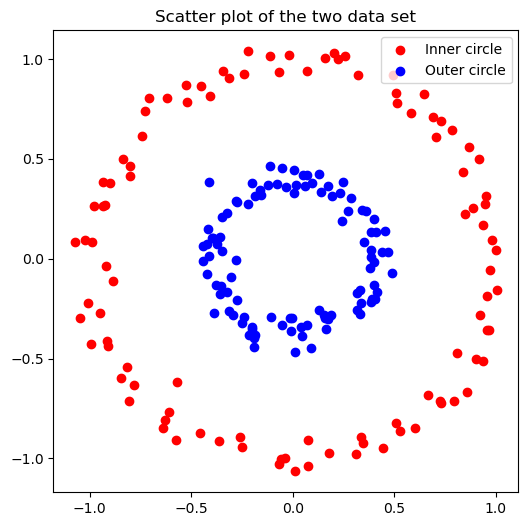

In [3]:
# create the two data sets 
X1, X2 = make_circles(n_samples=200, noise=0.05, factor=0.4)

# to plot the two circles we first need to separate them 
A = X1[np.where(X2==0)]
B = X1[np.where(X2==1)]

# we can now make a 2 dimensional scatter plot 
plt.figure(figsize = [6,6])
plt.title(r'Scatter plot of the two data set')
plt.scatter(A[:,0], A[:,1], c = 'red', label = 'Inner circle')
plt.scatter(B[:,0], B[:,1], c = 'blue', label = 'Outer circle')
plt.legend(loc = 'upper right')
plt.show()



We clearly see that the data points are characterised by a specific pattern (they lie on tho different circles), but they can not be separated linearly in $2$ dimensions, but they can in $3$ dimension with an hyperplane. In order to do so we will use the function
$$
f(x,y) = (x,y, x^2+y^2)
$$

In [4]:
# define the function 
def f (x,y):
    """ Implements the function f(x,y) = (x,y, x^2 +y^2)"""
    return np.array([x, y, x**2+y**2])

# we can now transforms the data points using the function

A_transformed = np.array([f(x,y) for (x,y) in zip(np.ravel(A[:,0]), np.ravel(A[:,1]))])           # np.ravel() flattens into a 1d array 
B_transformed = np.array([f(x,y) for (x,y) in zip(np.ravel(B[:,0]), np.ravel(B[:,1]))])
print('Mapped points first circle : ', A_transformed)
print('Mapped points second circle : ', B_transformed)

Mapped points first circle :  [[ 0.58223303  0.73044106  0.87253945]
 [ 0.52875629 -0.86107928  1.02104073]
 [-0.36580243 -0.91504818  0.97112459]
 [ 0.32286272  0.91976192  0.95020233]
 [ 0.07635627 -0.90515367  0.82513344]
 [-0.92290907  0.26741684  0.92327292]
 [-1.01060463 -0.22130922  1.07029948]
 [ 0.96407908 -0.35909892  1.0584005 ]
 [-0.74432221  0.6135513   0.93046076]
 [ 0.84675596  0.22415313  0.76724028]
 [ 0.93465881 -0.51371663  1.13749187]
 [-0.70947017  0.80682368  1.15431236]
 [-0.93656916  0.38435867  1.02489338]
 [-0.93738164  0.26330049  0.94801148]
 [-0.06816689 -1.02821675  1.06187641]
 [-0.25870395 -0.89491699  0.86780414]
 [-0.52128416  0.78536165  0.8885301 ]
 [ 0.72314183 -0.71108663  1.02857831]
 [-0.80007326  0.46428121  0.85567426]
 [ 0.86894787  0.56092432  1.0697065 ]
 [ 0.64622822  0.8239587   1.09651885]
 [-0.06973995  0.93358185  0.87643873]
 [-0.63164736 -0.80898478  1.05343475]
 [-0.61756718  0.80502586  1.02945585]
 [-0.11211842  1.01277711  1.03828

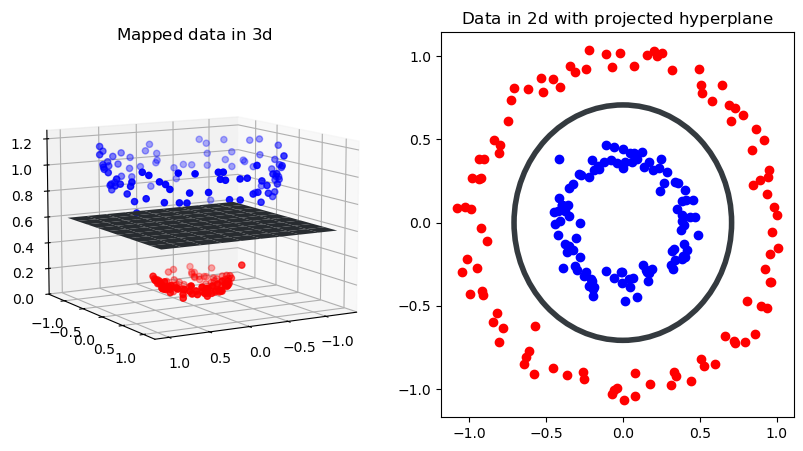

In [5]:
# we can now plot the data in 3 dimensions
fig = plt.figure(figsize = [10,5])
ax = fig.add_subplot(121, projection='3d')
ax.set_title(r"Mapped data in $3$d")
ax.scatter(A_transformed[:,0], A_transformed[:,1], A_transformed[:,2], marker='o', c ='blue')
ax.scatter(B_transformed[:,0], B_transformed[:,1], B_transformed[:,2], marker='o', c ='red')
ax.view_init(10,60)
# create the hyperplane
x = np.arange(-1.25, 1.25, 0.25)
y = np.arange(-1.25, 1.25, 0.26)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z[:,:] = 0.6
ax.plot_surface(X, Y, Z, color='#343A3F')

# plot the data in 2 d
ax2d = fig.add_subplot(122)
ax2d.set_title(r"Data in $2$d with projected hyperplane ")
ax2d.scatter(A_transformed[:,0], A_transformed[:,1], marker = 'o', c = 'red')
ax2d.scatter(B_transformed[:,0], B_transformed[:,1], marker=  'o', c = 'blue') 
ax2d.add_patch(pl.Circle((0,0), radius=np.sqrt(0.5), fill=False,  linewidth=4.0, color='#343A3F'))

plt.show()

# Quantum feature maps 
So far, we have seen what happens in classical machine learning. In quantum machine learning it is essential to define objects that enable to map classical data into their quantum mechanical counterpart. To address these issues, in QML one defines quantum feature maps. A quantum feature map, as the same suggests, is a map $\phi(\vec{x})$ that maps a classical input vector $\vec{x}$ (usually denoted as feature vector) into an Hilbert space in the form of the operator, $\vec{x} \to \ket{\phi(\vec{x})}$
$$ \ket{\phi(\vec{x})}\bra{\phi(\vec{x})}$$
The mapping $\vec{x} \to \ket{\phi(\vec{x})}$ is usually accomplished by a unitary $ U_{\phi(\vec{x})} $ which is implemented trough the use of a quantum parametrized circuit.
The importance of constructing efficient quantum feature maps lies in the fact that there exists quantum feature maps that are hard to implement and test classically, thus gaining a possible advantage over classical machine learnign approaches.
One way to do this in qiskit is to use the PauliFeatureMap which (see documentation) is a data encoding circuit taking as input $\vec{x} \in \mathbb{R}^n$, where $n$ is the number of features, represented by the unitary
$$
U_{\phi(\vec{x})} = \exp\left(i\sum_{S \in \mathcal{I}}\phi_s(\vec{x})\prod_{i}P_i\right)
$$
where $S$ is a set of qubits indices that described the connection in the feature map, $\mathcal{I}$ is a set containing all the indices set, and $P_i \in \{I,X,Y,Z\}$.
 The quantum feature map of depth $d$ is implemented by the unitary
$$
\mathcal{U}_{\phi(\vec{x})} = \prod_{d}U_{\phi(\vec{x})}H^{\otimes{}n}$$
where $H$ is the usual Hadamrd gate.
The data mapping function is given by: 
$$
\phi_{S}(\vec{x}) : \vec{x} \to \begin{dcases}
x_i \quad \quad & \text{if } S = \{i\} \\
\prod_{j \in S} (\pi -x_j) \quad & \text{if } |S| >1

\end{dcases}
$$
where $|S|$ denotes the cardinality of the set $S$. For $|S|>1$ we can have for example $S = \{i,j\}$ so that $\displaystyle \phi_{s}(\vec{x}) = (\pi-x_i)(\pi-x_j)$.
More generally we can express $S$ as:
$$
S \in \left\{\begin{pmatrix} 
n \\
k 
\end{pmatrix}, k = 1,2, \dots, n\right\}
$$
In the specific case $k = 2$ one obtains the $ZZ$FeatureMap, with $P_0 = Z$ and $P_1 = ZZ$
$$
\mathcal{U}_{\phi(\vec{x})} = \left(\exp\left(i\sum_{jk}\phi_{\{i,j\}}Z_j \otimes Z_k\right)\exp\left(\sum_{j}\phi_{\{j\}}Z_j\right)\right)^d
$$


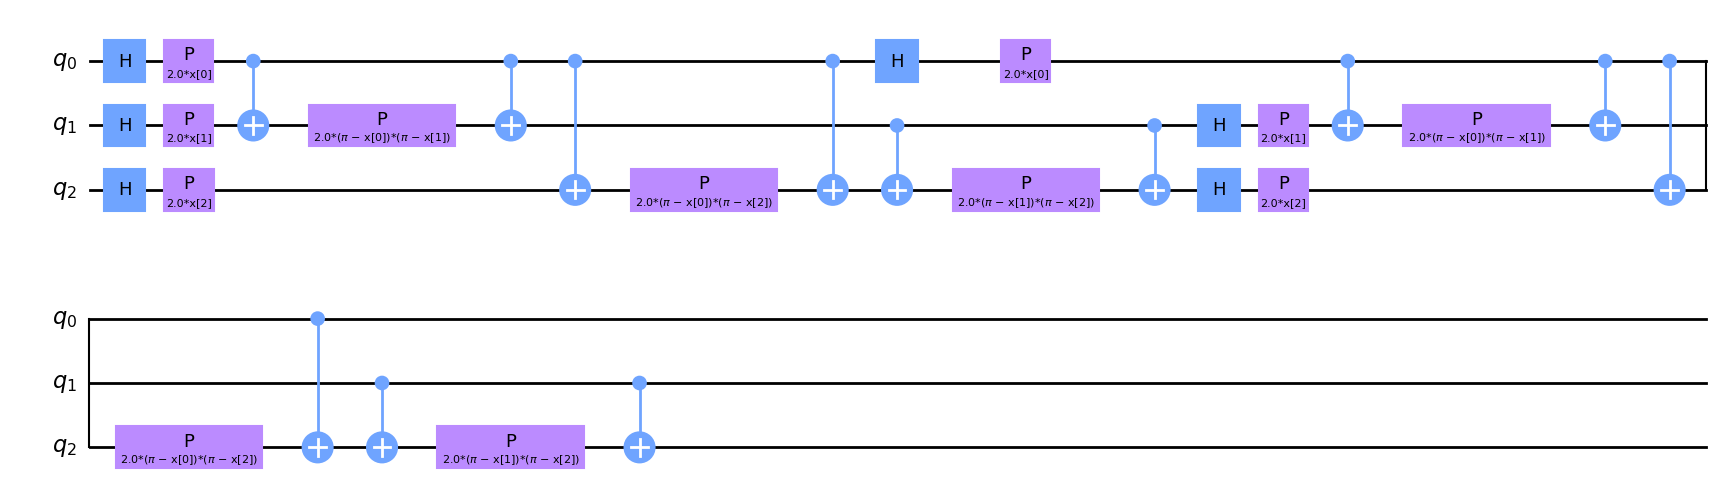

In [6]:
# we can now implement the ZZ feature map 
from qiskit.circuit.library import ZZFeatureMap

# we use 3 features, with depth d = 2
feature_mapzz = ZZFeatureMap(feature_dimension = 3, reps = 2)
feature_mapzz.decompose().draw(output = "mpl", style = "clifford")

We can now take a closer look at ad hoc data in Qiskit which contains a dataset split into $2$ classes sampled from $ZZ$FeatureMap and used in Reference 1. We can chose the number of data points, the number of testing data and the number of feature.

In [7]:
from qiskit_machine_learning.datasets import ad_hoc_data
#ad_hoc_data(training_size, test_size, n, gap, plot_data=False, one_hot=True, include_sample_total=False) 
train_data, train_labels, test_data, test_labels, sample_total = (ad_hoc_data(training_size=20, test_size=5, n=2, gap=0.3,
                                                                include_sample_total=True, one_hot=False))

ad_hoc_data (see documentation) generates a dataset in the following way: it takes samples uniformly distributed vectors $\vec{x} \in A = [0, 2\pi]^n$ and apply the feature map
$$
\ket{\Phi(\vec{x})} = U_{\phi(\vec{x})}H^{\otimes{}n}U_{\phi(\vec{x})}H^{\otimes{}n}\ket{0}^{\otimes n}
$$
where, as usual 
$$
U_{\phi(\vec{x})} = \exp\left(i\sum_{S \in \mathcal{I}}\phi_s(\vec{x})\prod_{i}P_i\right) 
$$
and $\phi_{i} = x_i$ and $\phi_{\{i,j\}} = (\pi-x_i)(\pi-x_j)$. Then, each vector is labelled according to the following rule, given the gap $\Delta$
$$
m(\vec{x}) = \begin{dcases}
+1 \quad if & \langle{\Phi(\vec{x})}|V^{\dagger}\prod_i V |\Phi(\vec{x})\rangle{}>\Delta \\ 
-1 \quad if & \langle{\Phi(\vec{x})}|V^{\dagger}\prod_i V |\Phi(\vec{x})\rangle{}<\Delta \\ 
\end{dcases}
$$
where $V\in $ SU$(4)$. Note that this implementation only works for $n = 2$ and $n = 3$.

In [8]:
# print the training data 
print("Train data : ", train_data)

Train data :  [[2.26194671 3.64424748]
 [4.0212386  4.77522083]
 [5.78053048 1.0681415 ]
 [2.32477856 3.0787608 ]
 [4.1469023  2.89026524]
 [2.32477856 0.        ]
 [2.07345115 3.0787608 ]
 [2.45044227 3.51858377]
 [5.2150438  2.70176968]
 [2.57610598 3.89557489]
 [3.39292007 5.90619419]
 [5.0893801  3.01592895]
 [5.71769863 3.01592895]
 [2.32477856 3.83274304]
 [5.40353936 0.18849556]
 [3.51858377 5.84336234]
 [4.27256601 1.50796447]
 [3.83274304 2.32477856]
 [2.76460154 4.27256601]
 [2.51327412 1.31946891]
 [3.01592895 0.18849556]
 [5.40353936 1.94778745]
 [1.63362818 2.136283  ]
 [2.95309709 4.08407045]
 [4.39822972 5.90619419]
 [3.89557489 0.81681409]
 [4.71238898 5.59203492]
 [0.75398224 1.82212374]
 [6.09468975 0.69115038]
 [0.         0.50265482]
 [4.52389342 4.08407045]
 [0.43982297 3.83274304]
 [4.96371639 0.50265482]
 [4.96371639 1.94778745]
 [6.1575216  5.34070751]
 [2.76460154 1.31946891]
 [1.31946891 0.37699112]
 [4.33539786 0.43982297]
 [0.75398224 0.81681409]
 [0.0628318

From this we can see that data points belong to $2$ different classes as we have requested in the ad_hoc_data method using $n=2$.

In [9]:
# select training data and test data to plot  
x1_train = np.array([train_data[np.where(train_labels[:] == 0), 0]])
y1_train = np.array([train_data[np.where(train_labels[:] == 0), 1]])
x2_train = np.array([train_data[np.where(train_labels[:] == 1), 0]])
y2_train = np.array([train_data[np.where(train_labels[:] == 1), 1]])

# test data 
x1_test =  np.array([test_data[np.where(test_labels[:] == 0), 0]])
y1_test =  np.array([test_data[np.where(test_labels[:] == 0), 1]])
x2_test =  np.array([test_data[np.where(test_labels[:] == 1), 0]])
y2_test =  np.array([test_data[np.where(test_labels[:] == 1), 1]])
print(sample_total)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0. -1. -1. ...  0.  1.  1.]
 [ 0.  0. -1. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


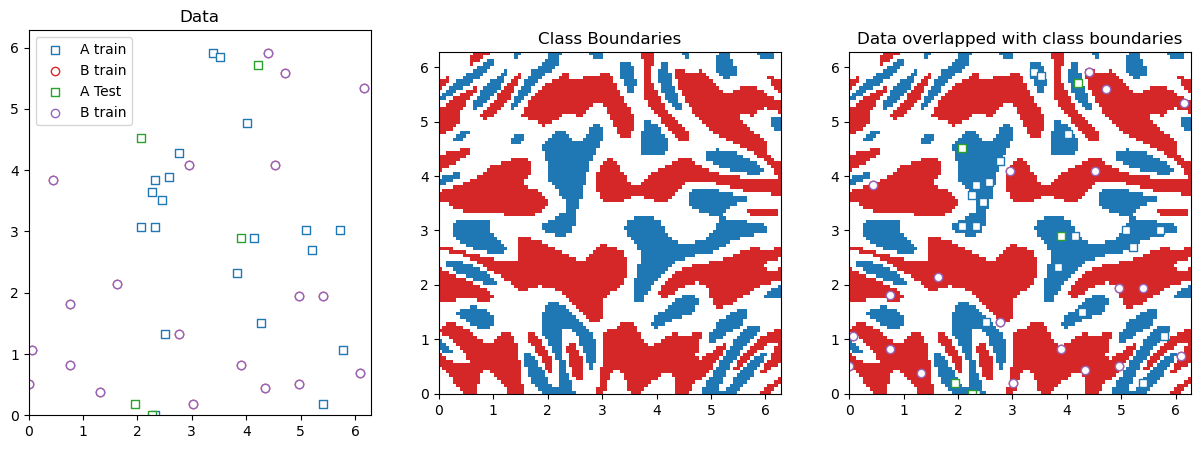

In [10]:
# plot the data 
fig = plt.figure(figsize=(15, 5))
axdata = fig.add_subplot(131)
axdata.set_title("Data")
axdata.set_ylim(0, 2 * np.pi)
axdata.set_xlim(0, 2 * np.pi)
axdata.scatter(x1_train, y1_train, marker='s', facecolors='w', edgecolors='C0',label = "A train")
axdata.scatter(x2_train, y2_train, marker='o', facecolors='w', edgecolors='C3',label = "B train")
axdata.scatter(x1_test, y1_test, marker='s', facecolors='w', edgecolors='C2',label = "A Test")
axdata.scatter(x2_train, y2_train, marker='o', facecolors='w', edgecolors='C4',label = "B train")

plt.legend()

# we can now plot the class boundaries 
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["C3","w","C0"])
axmap = fig.add_subplot(132)
axmap.set_title(r"Class Boundaries")
axmap.set_ylim(0, 2 * np.pi)
axmap.set_xlim(0, 2 * np.pi)
axmap.imshow(np.asmatrix(sample_total).T, interpolation='nearest', origin='lower', cmap=cmap, extent=[0, 2 * np.pi, 0, 2 * np.pi])

# finally we can plot the overlap of data with class boundaries 
axoverlap = fig.add_subplot(133)
axoverlap.set_ylim(0, 2 * np.pi)
axoverlap.set_xlim(0, 2 * np.pi)
axoverlap.set_title(r"Data overlapped with class boundaries")
axoverlap.scatter(x1_train, y1_train, marker='s', facecolors='w', edgecolors='C0',label = "A train")
axoverlap.scatter(x2_train, y2_train, marker='o', facecolors='w', edgecolors='C3',label = "B train")
axoverlap.scatter(x1_test, y1_test, marker='s', facecolors='w', edgecolors='C2',label = "A Test")
axoverlap.scatter(x2_train, y2_train, marker='o', facecolors='w', edgecolors='C4',label = "B train")
axoverlap.imshow(np.asmatrix(sample_total).T, interpolation='nearest', origin='lower', cmap=cmap, extent=[0, 2 * np.pi, 0, 2 * np.pi])
plt.show()

Some remarks on the results obtained. In the first plot the train and test data points are represented in a scatter plot and clearly there in no obvious pattern that tells us which data point belong to which class. In the second plot we have the data represented in the feature space mapped by $ZZ$FeatureMap. In the last one we can see the data overlapped with the class boundaries in the $2$ dimensional space. Using this plot we can actually see a pattern in the data, mainly we see how the train and test data points, belonging to both $A$ and $B$ distribute themselves in different regions of the feature space. This means that we recognize a pattern bewteen data points and can classify them.

# Quantum kernels
Now we focus our attention on Quantum kernels. We have already seen of classical kernels work and now we wish to understand how their quantum mechanical counterpart behave. We always start from the feature map $\phi(\vec{x}_i)$ which in this case results in a quantum kernel of the form
$$
k(\vec{x_i}, \vec{x}_j) = \phi^{\dagger}(\vec{x}_i)\phi(\vec{x}_j)
$$
Just like in the classical case, the kernel can be represented as a matrix $K$. whose matrix elements are specified by
$$
K_{ij} = |\langle{\phi(\vec{x}_i)}|\phi(\vec{x}_j)\rangle{}|^2
$$
In order to compute this transition amplitude, we suppose that the feature map $\phi(\vec{x})$ can be implemented by using a parametrized quantum circuit, specified by a unitary $U_{\phi(\vec{x})}$ 
$$ \ket{\phi(\vec{x})} = U_{\phi(\vec{x})}\ket{0}^{\otimes n}$$
Thus, the matrix element can be computed as
$$
K_{ij} = |\bra{0^{\otimes n}}U^{\dagger}_{\phi(x_i)}U_{\phi(\vec{x}_j)}\ket{0^{\otimes n}}|^2
$$
Let us analytically compute the quantum kernel for the data set we have been using. We show two different methods that yield the same result, one using the opflow library and the second one using qiskit primitives.


/var/folders/hb/_vnjt6s167vgsfsr3dc6zm4w0000gn/T/ipykernel_11182/3190098295.py:1: DeprecationWarning: The ``qiskit.opflow`` module is deprecated as of qiskit-terra 0.24.0. It will be removed in Qiskit 1.0. For code migration guidelines, visit https://qisk.it/opflow_migration.
  from qiskit import opflow
/var/folders/hb/_vnjt6s167vgsfsr3dc6zm4w0000gn/T/ipykernel_11182/3190098295.py:14: DeprecationWarning: The class ``qiskit.opflow.state_fns.circuit_state_fn.CircuitStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed in the Qiskit 1.0 release. For code migration guidelines, visit https://qisk.it/opflow_migration.
  x_circuits = opflow.CircuitStateFn(feature_map).bind_parameters(
/var/folders/hb/_vnjt6s167vgsfsr3dc6zm4w0000gn/T/ipykernel_11182/3190098295.py:17: DeprecationWarning: The class ``qiskit.opflow.state_fns.circuit_state_fn.CircuitStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed in the Qiskit 1.0 release. For code migration guidelines, visit 

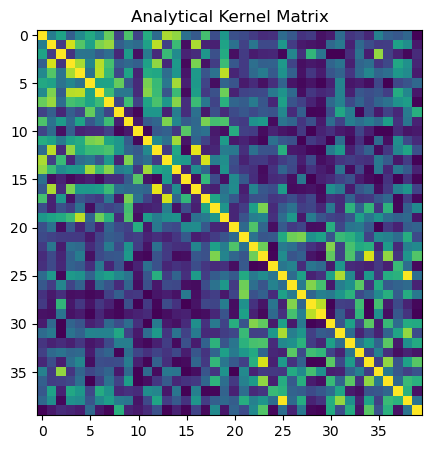

In [11]:
from qiskit import opflow
def calculate_kernel(feature_map, x_data, y_data=None):
    """
        Calculates  kernel matrix from provided feature map and
        dataset(s), x & (y). If y isn't given, self inner product
        of x is calculated.
        No error checking is performed, feature map and datasets
        assumed to have the same dimension
    """
    if y_data is None:
        y_data = x_data
    # Use Operator Flow to create a list of feature map circuits,
    # parameterized by each data point
    x_circuits = opflow.CircuitStateFn(feature_map).bind_parameters(
        dict(zip(feature_map.parameters, np.transpose(x_data).tolist()))
        )
    y_circuits = opflow.CircuitStateFn(feature_map).bind_parameters(
        dict(zip(feature_map.parameters, np.transpose(y_data).tolist()))
        )
    # Compute the square of the conjugate inner product of the feature
    # map circuits: the kernel matrix
    kernel = np.abs(
        (~y_circuits.to_matrix_op() @ x_circuits.to_matrix_op()).eval()
    )**2
    return kernel

adhoc_feature_map = ZZFeatureMap(feature_dimension=2, reps=2)
kernel = calculate_kernel(adhoc_feature_map, train_data)
plt.figure(figsize=(5, 5))
plt.imshow(np.asmatrix(kernel),interpolation='nearest', origin='upper')
plt.title("Analytical Kernel Matrix")
plt.show()

In [12]:
from qiskit.primitives import Sampler
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

def calculate_kernel(feature_map, x_data, y_data = None):
    """
    Calculates a quantum kernel matrix from the provided feature map and dataset(s).
    Uses the inner product between quantum states created by the feature map.

    Args:
        feature_map (QuantumCircuit): A parameterized quantum circuit.
        x_data (ndarray): First dataset, shape (num_samples, num_features).
        y_data (ndarray, optional): Second dataset. If None, uses x_data (self kernel).

    Returns:
        np.ndarray: Kernel matrix of shape (len(x_data), len(y_data)).
    """
    if y_data is None:
        y_data = x_data

    num_x = len(x_data)
    num_y = len(y_data)
    kernel_matrix = np.zeros((num_x, num_y))

    # Create statevectors for each input using the feature map
    x_states = []
    for x in x_data:
        qc = feature_map.bind_parameters(dict(zip(feature_map.parameters, x)))
        sv = Statevector.from_instruction(qc)
        x_states.append(sv)

    y_states = []
    for y in y_data:
        qc = feature_map.bind_parameters(dict(zip(feature_map.parameters, y)))
        sv = Statevector.from_instruction(qc)
        y_states.append(sv)

    # Calculate |<phi(x)|phi(y)>|^2 for all pairs
    for i, x_sv in enumerate(x_states):
        for j, y_sv in enumerate(y_states):
            inner_product = np.vdot(y_sv.data, x_sv.data)
            kernel_matrix[i, j] = np.abs(inner_product) ** 2

    return kernel_matrix


/var/folders/hb/_vnjt6s167vgsfsr3dc6zm4w0000gn/T/ipykernel_11182/3115656336.py:28: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use assign_parameters() instead
  qc = feature_map.bind_parameters(dict(zip(feature_map.parameters, x)))
/var/folders/hb/_vnjt6s167vgsfsr3dc6zm4w0000gn/T/ipykernel_11182/3115656336.py:34: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use assign_parameters() instead
  qc = feature_map.bind_parameters(dict(zip(feature_map.parameters, y)))


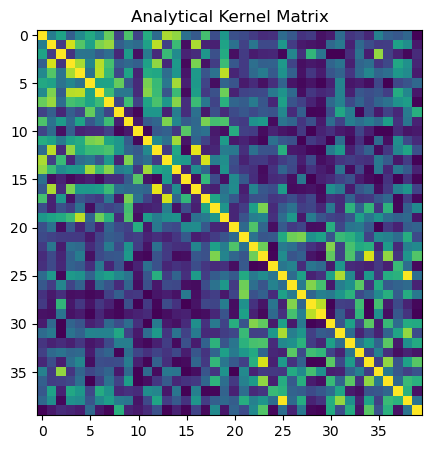

In [13]:
adhoc_feature_map = ZZFeatureMap(feature_dimension=2, reps=2)
kernel = calculate_kernel(adhoc_feature_map, train_data)
plt.figure(figsize=(5, 5))
plt.imshow(np.asmatrix(kernel),interpolation='nearest', origin='upper')
plt.title("Analytical Kernel Matrix")
plt.show()

As we have said before, many machine learning algorithm use the kernel trick, which consints in mapping input data points into an higher dimensional space where is sometimes easier to detect pattern between data rather than in the input space (see for example the circle data sets at the beginning of the notebook). 
A very well known classical algorithm of this kind is the Support Vector Machine (SVM) which consinsts in mapping the points in the feature space and uses the hyperplane to operate on the data points (classification problems, regression problems, just to name $2$).
For the classigfication problem the hyperplane ought to have the maximun distance to the nearest data points belonging to each class in order to find the most optimal solution.
We may now use the quantum kernel support classification algorithm on the ad_hoc dataset.

/var/folders/hb/_vnjt6s167vgsfsr3dc6zm4w0000gn/T/ipykernel_11182/3115656336.py:28: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use assign_parameters() instead
  qc = feature_map.bind_parameters(dict(zip(feature_map.parameters, x)))
/var/folders/hb/_vnjt6s167vgsfsr3dc6zm4w0000gn/T/ipykernel_11182/3115656336.py:34: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use assign_parameters() instead
  qc = feature_map.bind_parameters(dict(zip(feature_map.parameters, y)))


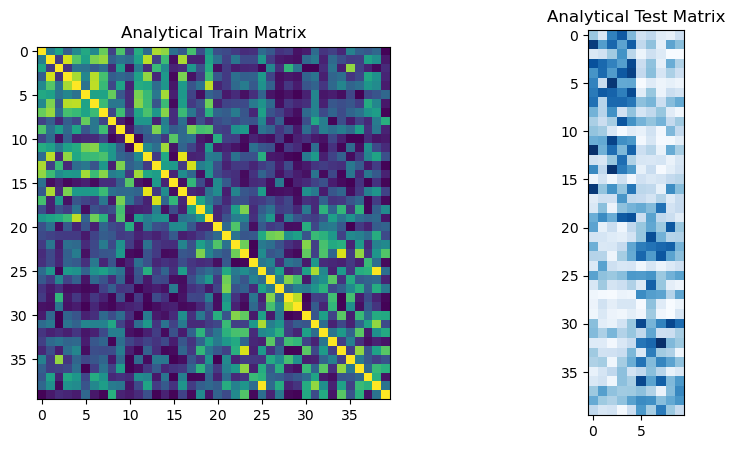

In [14]:
train_kernel = calculate_kernel(adhoc_feature_map, train_data)
test_kernel = calculate_kernel(adhoc_feature_map, train_data, test_data)
# plot analytical matrices
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(np.asmatrix(train_kernel), interpolation='nearest', origin='upper')
axs[0].set_title("Analytical Train Matrix")
axs[1].imshow(np.asmatrix(test_kernel), interpolation='nearest', origin='upper', cmap='Blues')
axs[1].set_title("Analytical Test Matrix")
plt.show()

Now we can do the same using the sklearn library

In [15]:
from sklearn.svm import SVC
# train scikit-learn svm model
model = SVC(kernel = 'precomputed')
model.fit(train_kernel, train_labels)
print("Number of support vectors for each class:" ,model.n_support_)
print("Indices of support vectors:", model.support_)

Number of support vectors for each class: [10 12]
Indices of support vectors: [ 2  3  7  8 10 12 15 16 18 19 20 22 23 24 25 28 31 33 34 35 37 39]


Using the idea which the SVM is based upon, we define all the data points that have the largest distance from the hyperplane for each class support vectors. From the result above we find that SVC has found $10$ support vectors for the first class and $12$ for the second one.
We can now plot these support vectors.

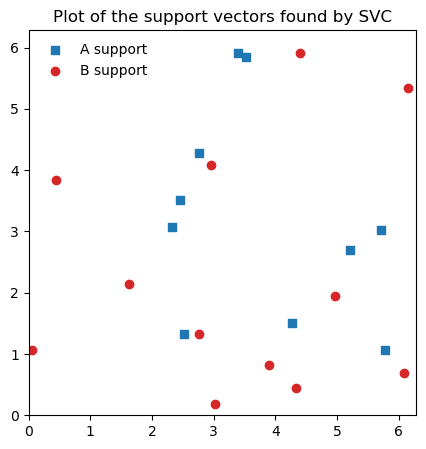

In [16]:
# Plot support vectors
support_trainx1 = np.array([train_data[model.support_[0:model.n_support_[0]], 0]])
support_trainy1 = np.array([train_data[model.support_[0:model.n_support_[0]], 1]])
support_trainx2 = np.array([train_data[model.support_[model.n_support_[0]:], 0]])
support_trainy2 = np.array([train_data[model.support_[model.n_support_[0]: ], 1]])
plt.figure(figsize=(5, 5))
plt.title(r'Plot of the support vectors found by SVC')
plt.ylim(0, 2 * np.pi)
plt.xlim(0, 2 * np.pi)
plt.scatter(support_trainx1, support_trainy1, marker='s', label="A support")
plt.scatter(support_trainx2, support_trainy2 ,marker='o', c='C3', label="B support")
plt.legend(loc='upper left', frameon=False)
plt.show()

# References 
1 - "Supervised learning with quantum enhanced feature spaces" ,Vojtech Havlicek, Antonio D. Córcoles, Kristan Temme, Aram W. Harrow, Abhinav Kandala, Jerry M. Chow, Jay M. Gambetta,  Nature 567, 209-212 (2019),  arXiv:1803.07128. 